In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature selection
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Handling class imbalance
from imblearn.over_sampling import SMOTE


In [ ]:
# Load Dataset
df = pd.read_csv('/content/heart_disease.csv')

# Task 1: Exploratory Data Analysis and Data Understanding
# Display Dataset Details
print("="*50)
print(f"Dataset Shape: {df.shape}")
print("="*50)

print("\nDataset Preview:\n")
print(df.head().to_string(index=False))  # Print dataset preview in table-like format
print("="*330)


Dataset Shape: (10000, 21)

Dataset Preview:

 Age Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking Family Heart Disease Diabetes       BMI High Blood Pressure Low HDL Cholesterol High LDL Cholesterol Alcohol Consumption Stress Level  Sleep Hours Sugar Consumption  Triglyceride Level  Fasting Blood Sugar  CRP Level  Homocysteine Level Heart Disease Status
56.0   Male           153.0              155.0            High     Yes                  Yes       No 24.991591                 Yes                 Yes                   No                High       Medium     7.633228            Medium               342.0                  NaN  12.969246           12.387250                   No
69.0 Female           146.0              286.0            High      No                  Yes      Yes 25.221799                  No                 Yes                   No              Medium         High     8.744034            Medium               133.0                157.0   9.355389         

In [ ]:
# Preview the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Get basic information about the dataset
print(df.info())

# Get summary statistics
print(df.describe())

    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No           

In [ ]:
# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values, or use other imputation methods

# Check for duplicates and remove them
df = df.drop_duplicates()

# Verify the cleaned dataset
print(df.isnull().sum())
print(df.shape)

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64
(7067, 21)


In [ ]:
# Compute summary statistics for numerical columns
print(df.describe().to_string() + "\n\n" + df.describe(include=['object']).to_string())

               Age  Blood Pressure  Cholesterol Level          BMI  Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  Homocysteine Level
count  7067.000000     7067.000000        7067.000000  7067.000000  7067.000000         7067.000000          7067.000000  7067.000000         7067.000000
mean     49.301542      149.856092         224.722938    29.023933     6.982595          250.523136           119.966605     7.448118           12.444451
std      18.270030       17.606064          43.529500     6.276510     1.749378           87.051480            23.612628     4.358898            4.311619
min      18.000000      120.000000         150.000000    18.007058     4.000605          100.000000            80.000000     0.010585            5.002810
25%      34.000000      134.000000         187.000000    23.633185     5.459460          176.000000            99.000000     3.629919            8.723192
50%      49.000000      150.000000         224.000000    29.046381     6.982

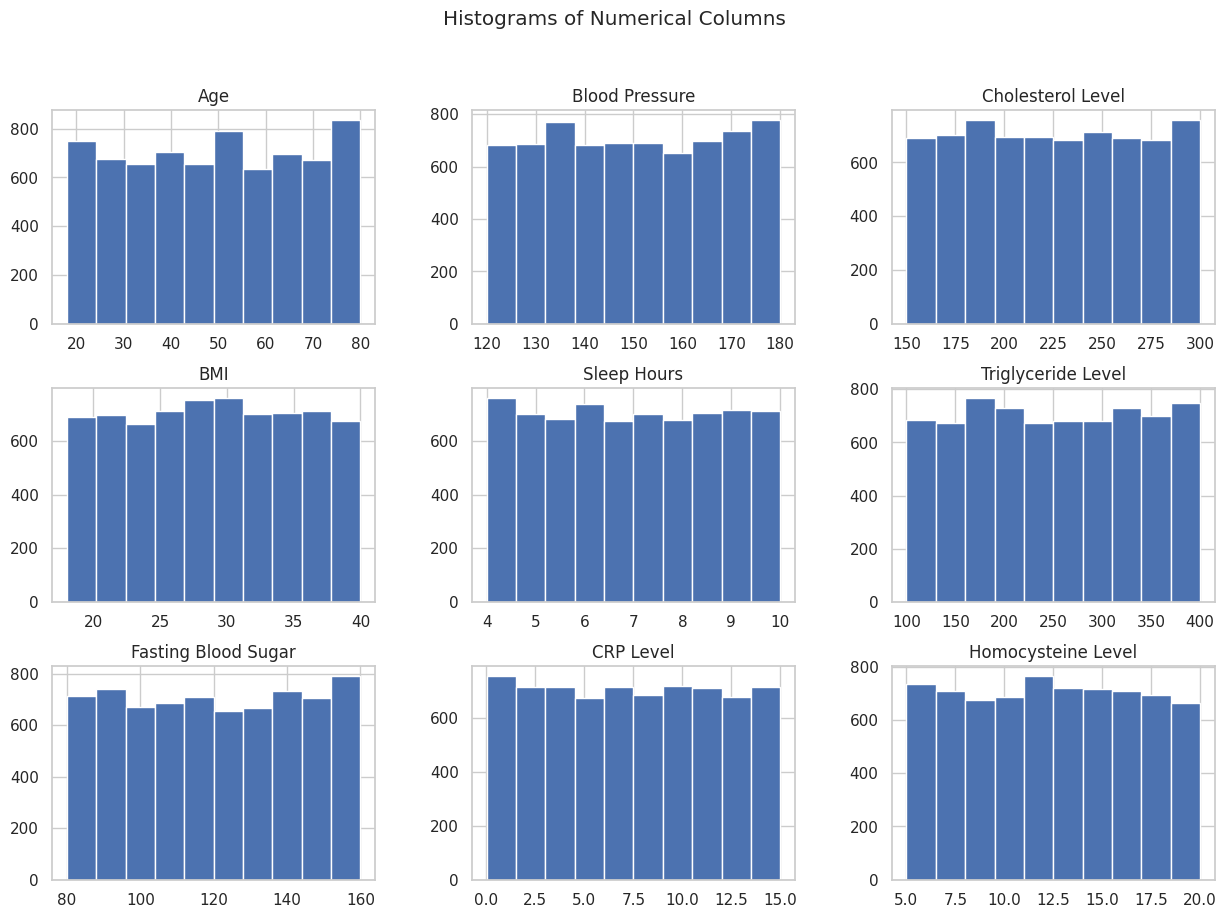

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for numerical columns
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()


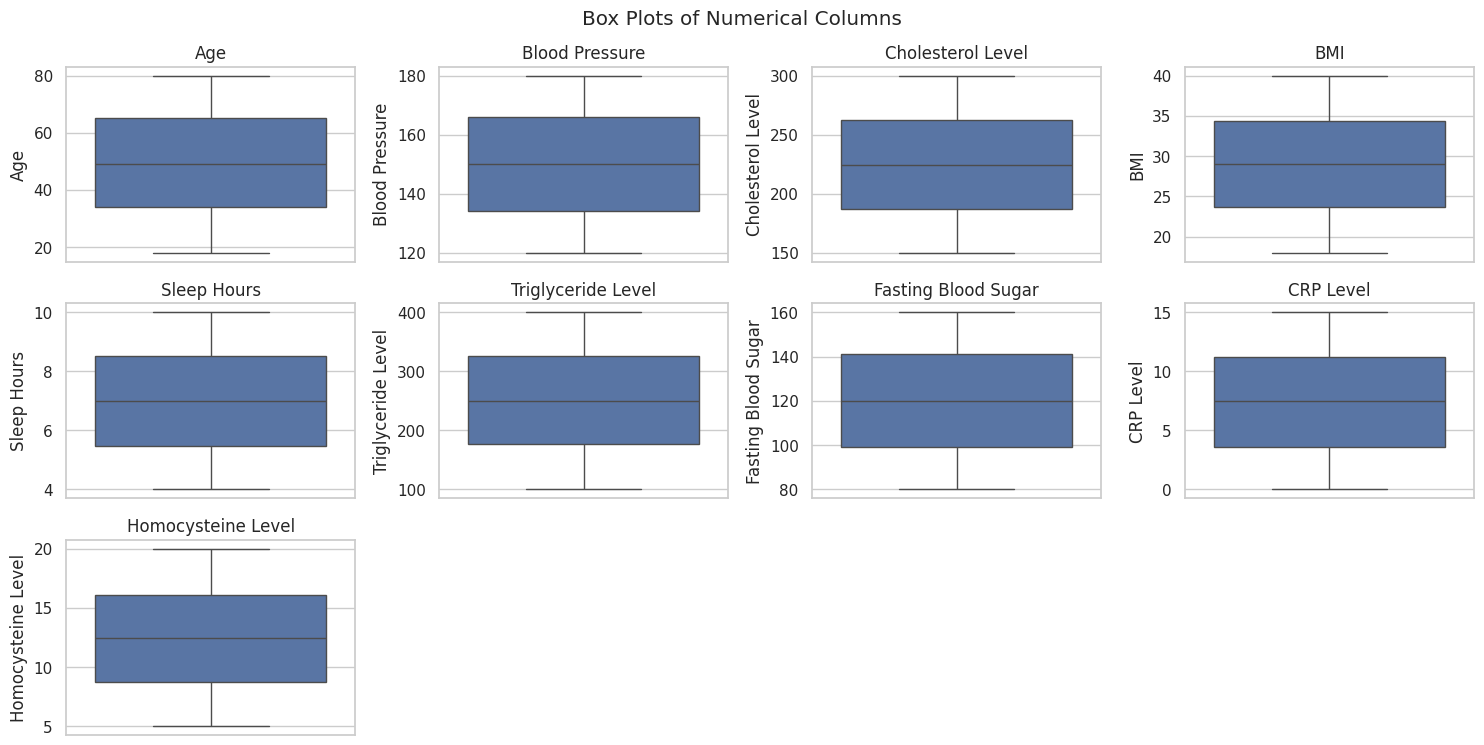

In [ ]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)

plt.suptitle('Box Plots of Numerical Columns')
plt.tight_layout()
plt.show()

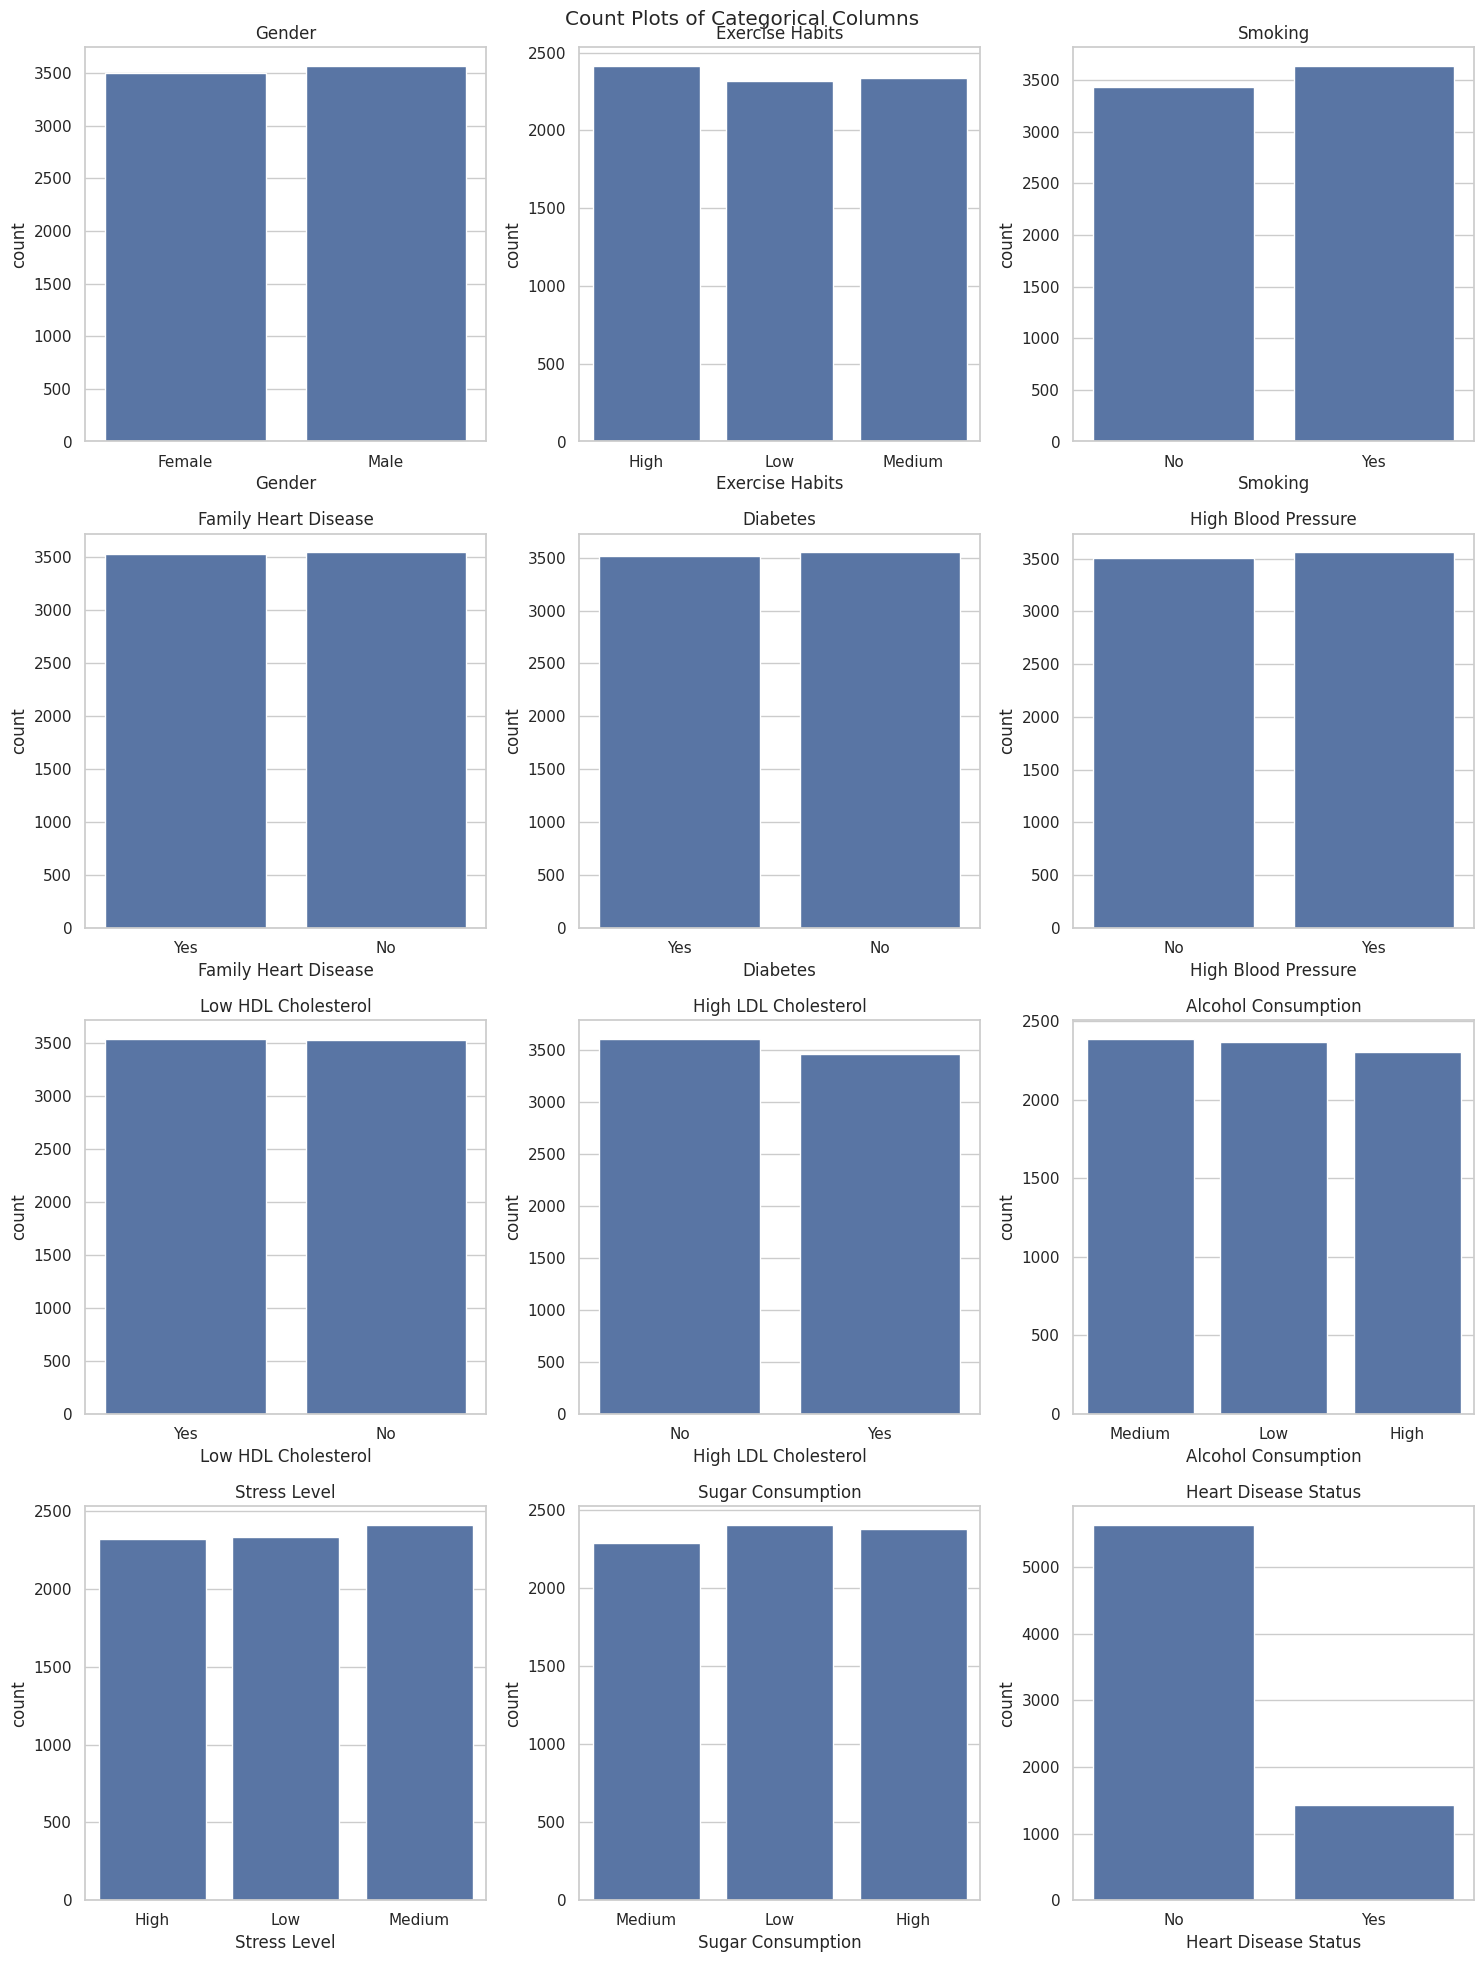

In [ ]:
# Count plots for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
num_categorical = len(categorical_columns)

# Dynamically calculate the number of rows and columns for subplots
num_rows = (num_categorical + 2) // 3  # Ensure enough rows
num_cols = min(3, num_categorical)     # Maximum of 3 columns

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=df[column])
    plt.title(column)
plt.suptitle('Count Plots of Categorical Columns')
plt.tight_layout()
plt.show()

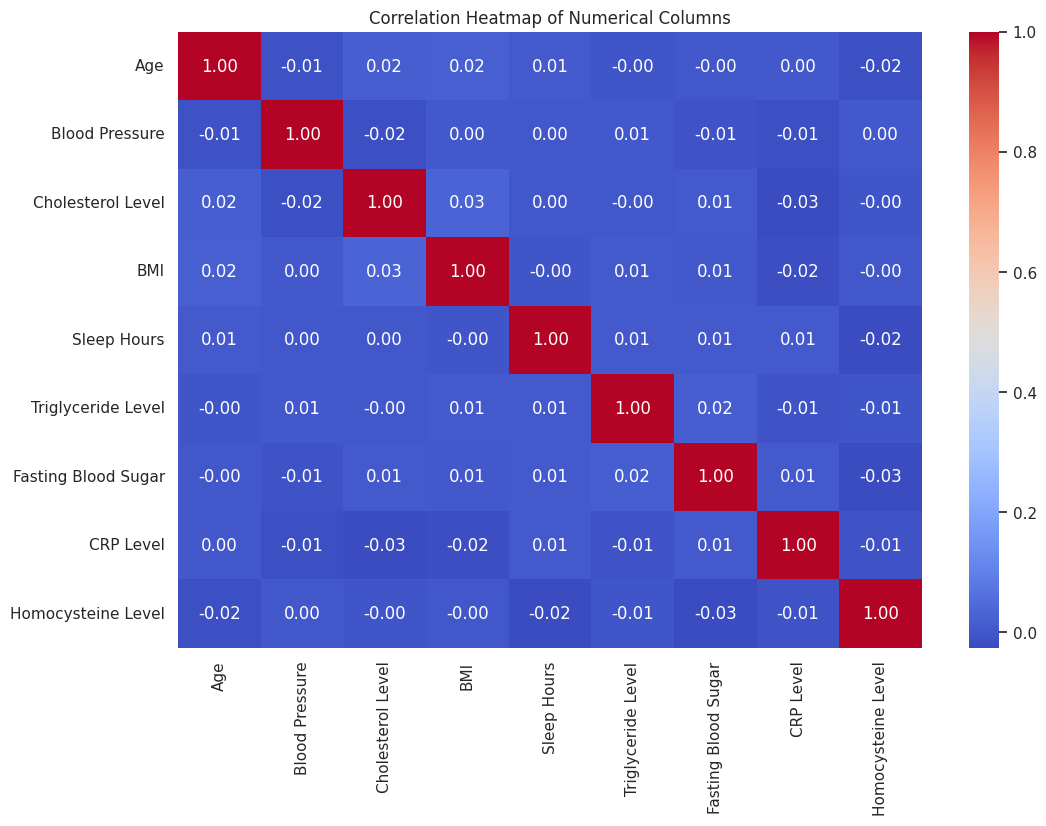

In [ ]:
# Filter numerical columns for correlation heatmap
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns
corr_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


In [ ]:
# Pairplot for numerical columns
plt.figure(figsize=(8, 10))
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Class Distribution Before Resampling:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
Class Distribution After Resampling:
Heart Disease Status
0    8000
1    8000
Name: count, dtype: int64

Evaluation Metrics for Training Set:
Accuracy: 0.7585
Precision: 0.7761
Recall: 0.7270
F1-Score: 0.7508
Confusion Matrix:
[[5053 1343]
 [1748 4656]]


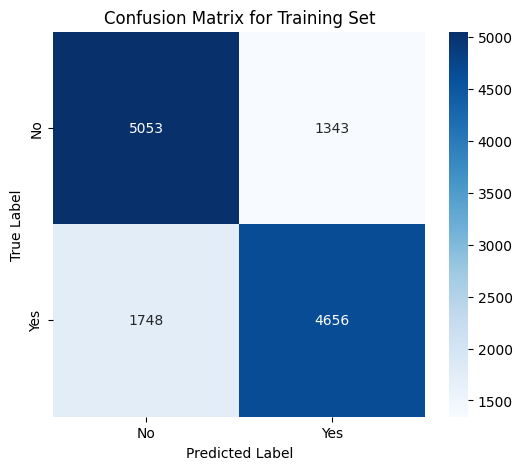


Evaluation Metrics for Test Set:
Accuracy: 0.7509
Precision: 0.7727
Recall: 0.7093
F1-Score: 0.7396
Confusion Matrix:
[[1271  333]
 [ 464 1132]]


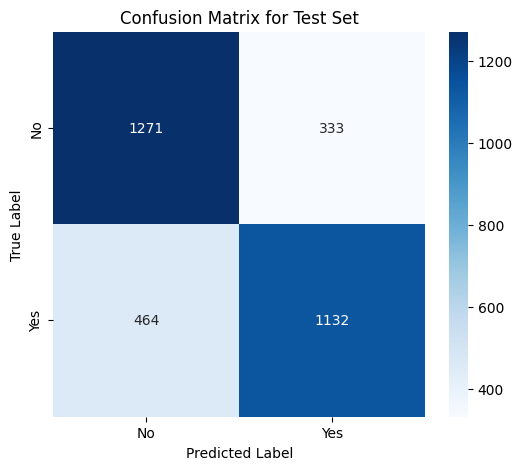

Optimal Threshold: 0.5820

Evaluation Metrics for Test (Optimal Threshold) Set:
Accuracy: 0.7619
Precision: 0.8379
Recall: 0.6479
F1-Score: 0.7307
Confusion Matrix:
[[1404  200]
 [ 562 1034]]


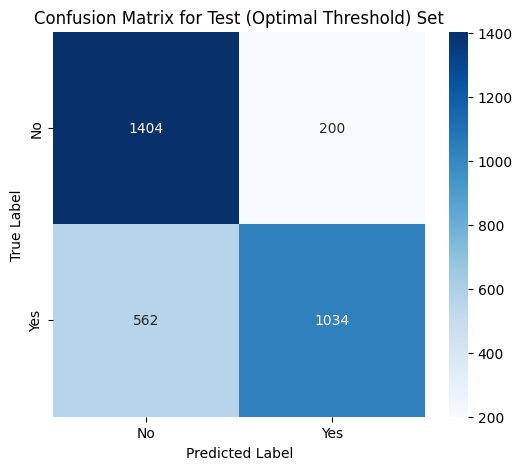


Evaluation Metrics for Test (Adjusted Threshold) Set:
Accuracy: 0.6566
Precision: 0.6082
Recall: 0.8753
F1-Score: 0.7177
Confusion Matrix:
[[ 704  900]
 [ 199 1397]]


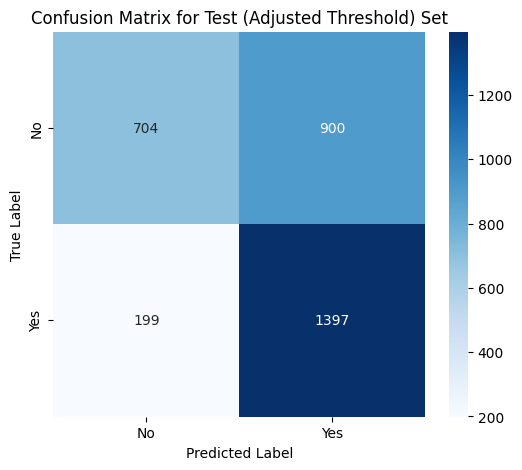

In [ ]:
#Build a Model from Scratch [5]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, multi_class=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.multi_class = multi_class
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if self.multi_class:
            self.weights = np.zeros((n_features, n_classes))
            self.bias = np.zeros((1, n_classes))
            y_one_hot = np.eye(n_classes)[y]
        else:
            self.weights = np.zeros(n_features)
            self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.multi_class:
                probabilities = self.softmax(linear_model)
                gradients_w = np.dot(X.T, (probabilities - y_one_hot)) / n_samples
                gradients_b = np.sum(probabilities - y_one_hot, axis=0) / n_samples
            else:
                probabilities = self.sigmoid(linear_model)
                gradients_w = np.dot(X.T, (probabilities - y)) / n_samples
                gradients_b = np.sum(probabilities - y) / n_samples

            self.weights -= self.learning_rate * gradients_w
            self.bias -= self.learning_rate * gradients_b

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_model) if self.multi_class else self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1) if self.multi_class else (probabilities >= threshold).astype(int)

# Load Data (Replace 'df' with your actual dataset)
df = pd.read_csv("/content/heart_disease.csv")
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
if y.dtype == 'object':
    y = y.map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# Handle missing values
X.fillna(X.mean(), inplace=True)  # Replace NaNs with column mean

# Check for class imbalance
print("Class Distribution Before Resampling:")
print(y.value_counts())

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(y_resampled.value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression from Scratch
lr_model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

def evaluate_model(y_true, y_pred, set_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation Metrics for {set_name} Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {set_name} Set")
    plt.show()

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")

# Get predicted probabilities
y_test_proba = lr_model.predict_proba(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Find the optimal threshold (maximizing TPR - FPR)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Make predictions with optimal threshold
y_test_pred_opt = lr_model.predict(X_test, threshold=optimal_threshold)

# Evaluate model with the optimal threshold
evaluate_model(y_test, y_test_pred_opt, "Test (Optimal Threshold)")


# Adjust decision threshold
y_test_pred_adj = lr_model.predict(X_test, threshold=0.3)
evaluate_model(y_test, y_test_pred_adj, "Test (Adjusted Threshold)")

Class Distribution Before Resampling:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
Class Distribution After Resampling:
Heart Disease Status
0    8000
1    8000
Name: count, dtype: int64

Evaluation Metrics for Test (Logistic Regression) Set:
Accuracy: 0.7425
Precision: 0.7598
Recall: 0.7074
F1-Score: 0.7326
Confusion Matrix:
[[1247  357]
 [ 467 1129]]


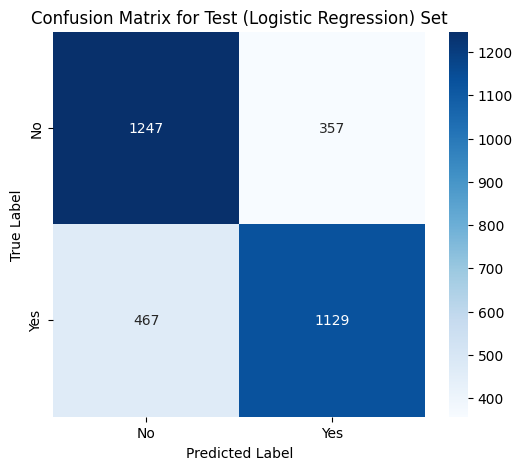


Evaluation Metrics for Test (Random Forest) Set:
Accuracy: 0.8297
Precision: 0.8972
Recall: 0.7437
F1-Score: 0.8133
Confusion Matrix:
[[1468  136]
 [ 409 1187]]


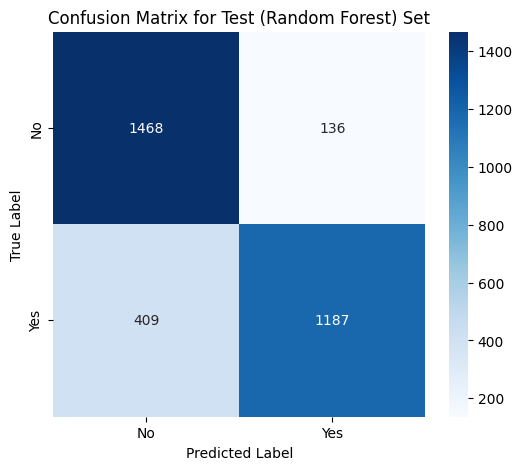

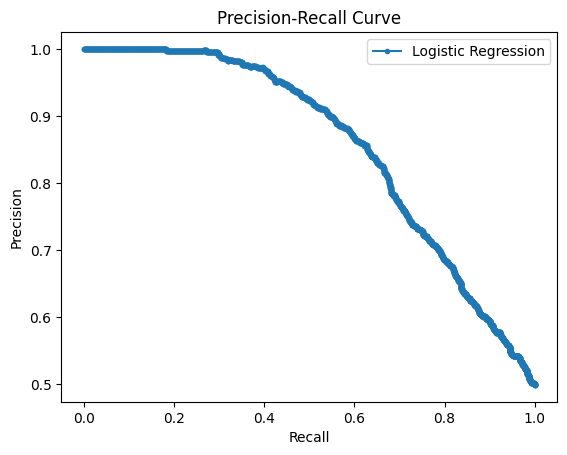

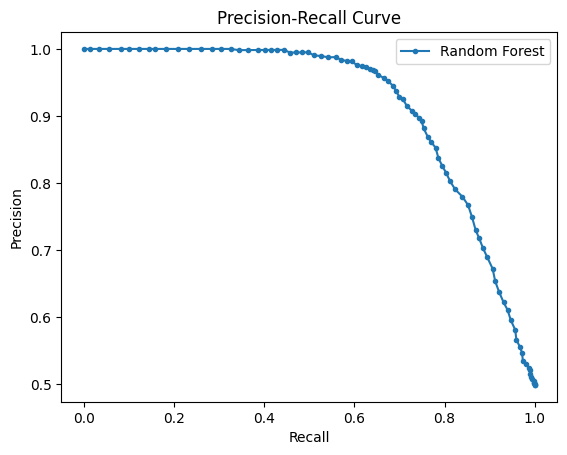

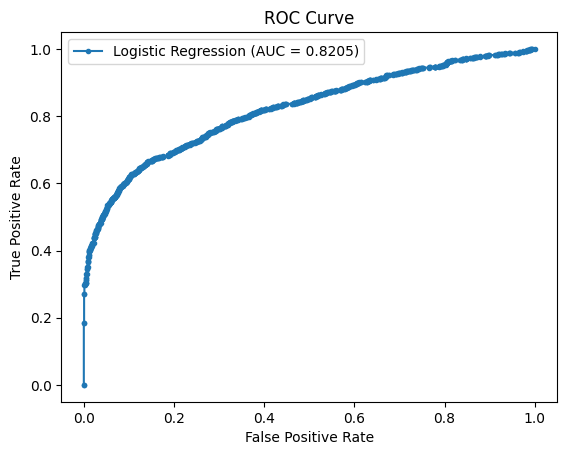

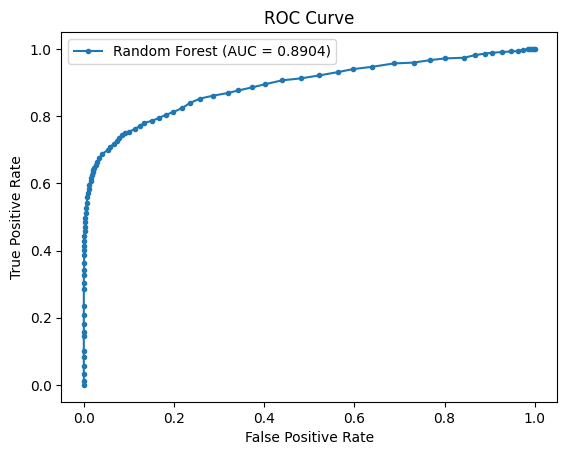


Random Forest performed better.


In [ ]:
#Build a Primary Model [5]:
# Load Dataset
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
if y.dtype == 'object':
    y = y.map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# Handle Missing Values
X.fillna(X.mean(), inplace=True)

# Check for class imbalance
print("Class Distribution Before Resampling:")
print(y.value_counts())

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(y_resampled.value_counts())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make Predictions
y_test_pred_log = log_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)

# Predict Probabilities
y_test_proba_log = log_model.predict_proba(X_test)[:, 1]
y_test_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Function to Evaluate Model
def evaluate_model(y_true, y_pred, set_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation Metrics for {set_name} Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {set_name} Set")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_test_pred_log, "Test (Logistic Regression)")
evaluate_model(y_test, y_test_pred_rf, "Test (Random Forest)")

# Function to Plot Precision-Recall Curve
def plot_precision_recall(y_true, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.plot(recall, precision, marker='.', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Function to Plot ROC Curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC = {auc_score:.4f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Compare Precision-Recall and ROC Curves
plot_precision_recall(y_test, y_test_proba_log, "Logistic Regression")
plot_precision_recall(y_test, y_test_proba_rf, "Random Forest")

plot_roc_curve(y_test, y_test_proba_log, "Logistic Regression")
plot_roc_curve(y_test, y_test_proba_rf, "Random Forest")

# Determine Best Model
log_f1 = f1_score(y_test, y_test_pred_log)
rf_f1 = f1_score(y_test, y_test_pred_rf)

if rf_f1 > log_f1:
    print("\nRandom Forest performed better.")
else:
    print("\nLogistic Regression performed better.")


Class Distribution Before Resampling:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
Class Distribution After Resampling:
Heart Disease Status
0    8000
1    8000
Name: count, dtype: int64

Evaluation for Test (Random Forest):
Accuracy: 0.8316
Precision: 0.9019
Recall: 0.7431
F1 Score: 0.8148
Confusion Matrix:
[[1475  129]
 [ 410 1186]]


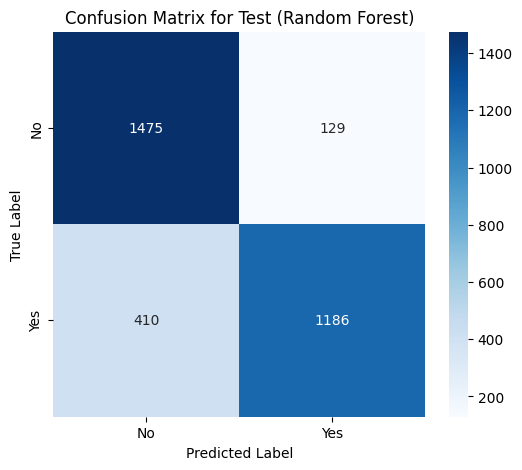


Evaluation for Test (Logistic Regression):
Accuracy: 0.7416
Precision: 0.7586
Recall: 0.7068
F1 Score: 0.7318
Confusion Matrix:
[[1245  359]
 [ 468 1128]]


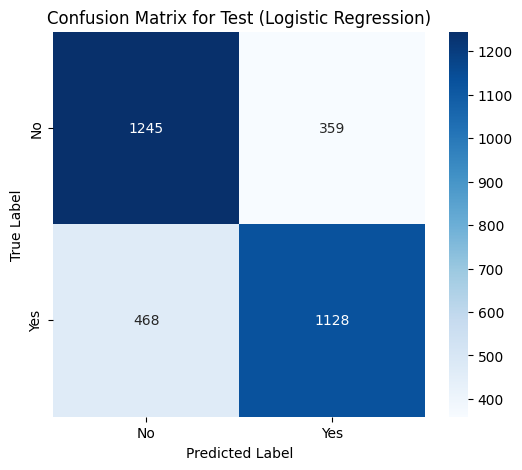

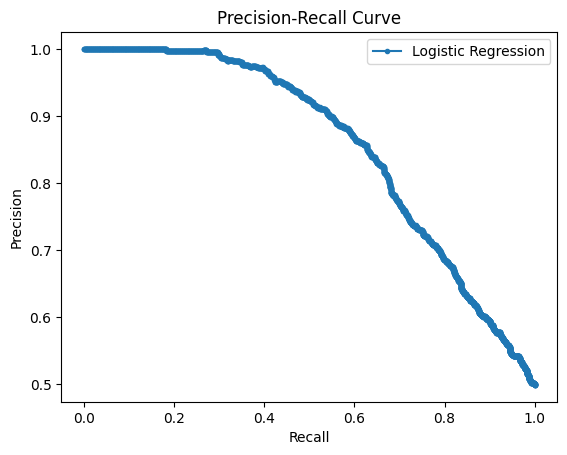

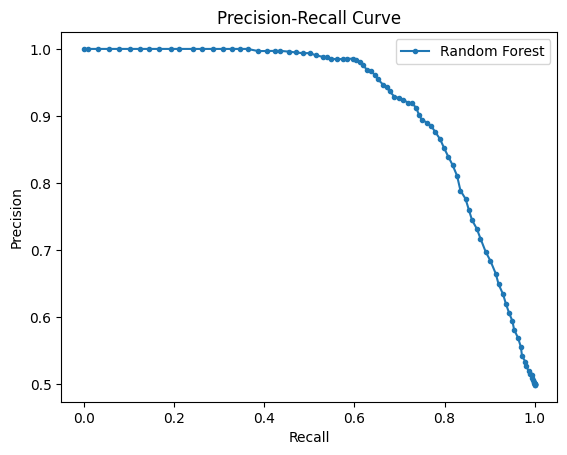

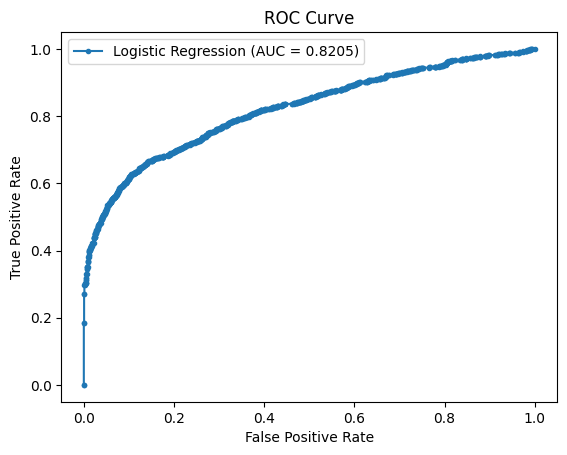

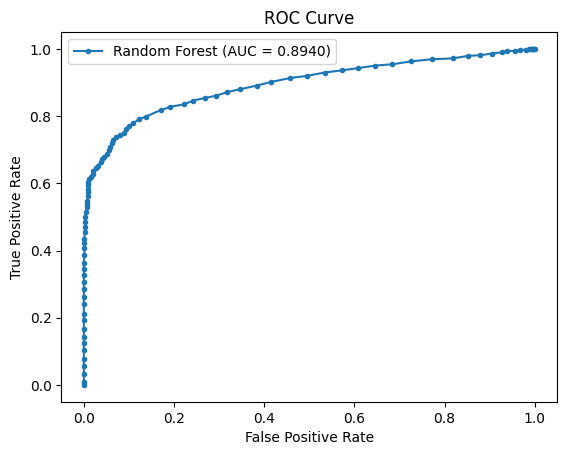

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Logistic Regression: {'C': 0.001, 'solver': 'liblinear'}

Evaluation for Test (Optimized Random Forest):
Accuracy: 0.8347
Precision: 0.9020
Recall: 0.7500
F1 Score: 0.8190
Confusion Matrix:
[[1474  130]
 [ 399 1197]]


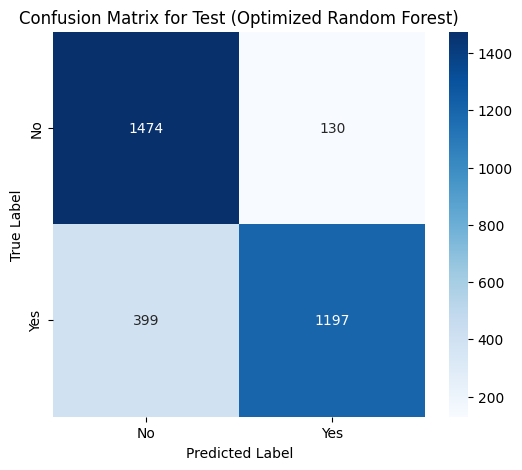


Evaluation for Test (Optimized Logistic Regression):
Accuracy: 0.7497
Precision: 0.7710
Recall: 0.7086
F1 Score: 0.7385
Confusion Matrix:
[[1268  336]
 [ 465 1131]]


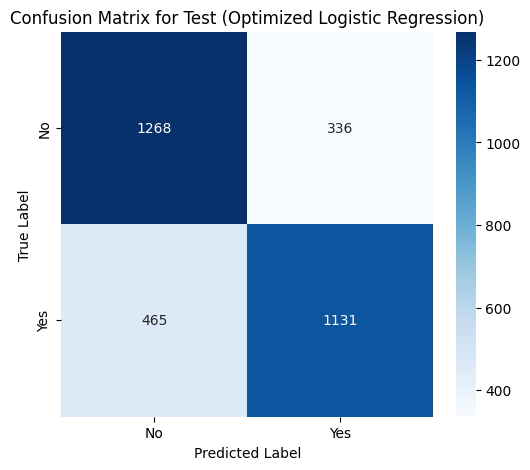

In [ ]:
#Hyper-parameter Optimization with Cross-Validation [2.5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load Data (Replace 'df' with your actual dataset)
df = pd.read_csv("/content/heart_disease.csv")
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
if y.dtype == 'object':
    y = y.map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# Handle Missing Values
X.fillna(X.mean(), inplace=True)

# Check for class imbalance
print("Class Distribution Before Resampling:")
print(y.value_counts())

# Apply SMOTE to balance classes (ensure you have SMOTE installed via imbalanced-learn)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(y_resampled.value_counts())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression
log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(X_train_scaled, y_train)

# Make Predictions
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_pred_log = log_model.predict(X_test_scaled)

# Get predicted probabilities for ROC and Precision-Recall
y_test_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Function to Evaluate Model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_test_pred_rf, "Test (Random Forest)")
evaluate_model(y_test, y_test_pred_log, "Test (Logistic Regression)")

# Function to Plot Precision-Recall Curve
def plot_precision_recall(y_true, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.plot(recall, precision, marker='.', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Function to Plot ROC Curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label=f"{model_name} (AUC = {auc_score:.4f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Compare Precision-Recall and ROC Curves
plot_precision_recall(y_test, y_test_proba_log, "Logistic Regression")
plot_precision_recall(y_test, y_test_proba_rf, "Random Forest")

plot_roc_curve(y_test, y_test_proba_log, "Logistic Regression")
plot_roc_curve(y_test, y_test_proba_rf, "Random Forest")

# Hyperparameter Optimization: GridSearchCV for Random Forest and Logistic Regression
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Apply GridSearchCV for Random Forest hyperparameter tuning
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Apply GridSearchCV for Logistic Regression hyperparameter tuning
log_grid = GridSearchCV(LogisticRegression(random_state=42), log_params, cv=5, n_jobs=-1, verbose=1)
log_grid.fit(X_train_scaled, y_train)

# Print best parameters for both models
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Parameters for Logistic Regression:", log_grid.best_params_)

# Train the optimized Random Forest
best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Train the optimized Logistic Regression
best_log = LogisticRegression(**log_grid.best_params_, random_state=42)
best_log.fit(X_train_scaled, y_train)

# Evaluate optimized models
y_test_pred_rf_opt = best_rf.predict(X_test_scaled)
y_test_pred_log_opt = best_log.predict(X_test_scaled)

# Evaluate on test set
evaluate_model(y_test, y_test_pred_rf_opt, "Test (Optimized Random Forest)")
evaluate_model(y_test, y_test_pred_log_opt, "Test (Optimized Logistic Regression)")


In [ ]:
#Feature selection using RFE(Recursive Feature Elimination)
data = pd.DataFrame({
    'Age': [60, 55, 50, 45, 65],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Blood Pressure': ['High', 'Normal', 'Low', 'High', 'Normal'],
    'Cholesterol Level': ['High', 'Low', 'Medium', 'High', 'Low'],
    'Exercise Habits': ['Good', 'Poor', 'Good', 'Poor', 'Good'],
    'Smoking': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Family Heart Disease': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Diabetes': ['Yes', 'No', 'No', 'Yes', 'No'],
    'BMI': [25, 28, 22, 30, 27],
    'High Blood Pressure': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Low HDL Cholesterol': ['No', 'Yes', 'No', 'Yes', 'No'],
    'High LDL Cholesterol': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Alcohol Consumption': ['Moderate', 'High', 'Low', 'High', 'Low'],
    'Heart Disease Status': [1, 0, 1, 0, 1]
})

#Encode Ordinal Features (Ordered categories)
ordinal_mappings = {
    'Blood Pressure': {'Low': 0, 'Normal': 1, 'High': 2},
    'Cholesterol Level': {'Low': 0, 'Medium': 1, 'High': 2},
}

for col, mapping in ordinal_mappings.items():
    data[col] = data[col].map(mapping)

#Encode Nominal Features (Unordered categories) using Label Encoding
nominal_features = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
                    'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
                    'High LDL Cholesterol', 'Alcohol Consumption']

label_encoder = LabelEncoder()
for col in nominal_features:
    data[col] = label_encoder.fit_transform(data[col])

# Define features and target variable
X = data.drop(columns=['Heart Disease Status'])
y = data['Heart Disease Status']

# Scale the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model (Logistic Regression)
model = LogisticRegression()

# Apply RFE to select top 5 features
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = [feature for feature, selected in zip(X.columns, rfe.support_) if selected]

# Print selected features
print("Selected features based on RFE:", selected_features)


Selected features based on RFE: ['Smoking', 'Family Heart Disease', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol']


Class Distribution Before Resampling:
Heart Disease Status
0    8000
1    2000
Name: count, dtype: int64
Class Distribution After Resampling:
Heart Disease Status
0    8000
1    8000
Name: count, dtype: int64

Evaluation for Test (Random Forest):
Accuracy: 0.8316
Precision: 0.9019
Recall: 0.7431
F1 Score: 0.8148
Confusion Matrix:
[[1475  129]
 [ 410 1186]]


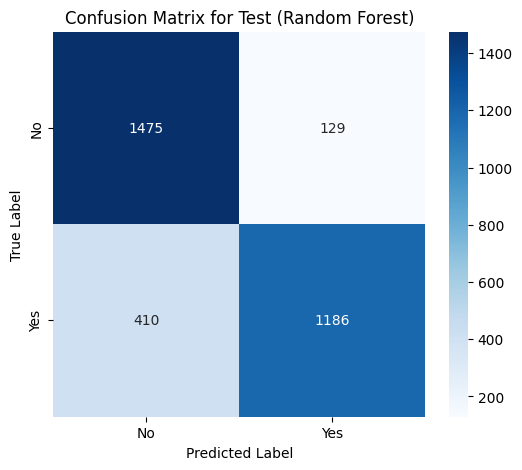


Evaluation for Test (Logistic Regression):
Accuracy: 0.7416
Precision: 0.7586
Recall: 0.7068
F1 Score: 0.7318
Confusion Matrix:
[[1245  359]
 [ 468 1128]]


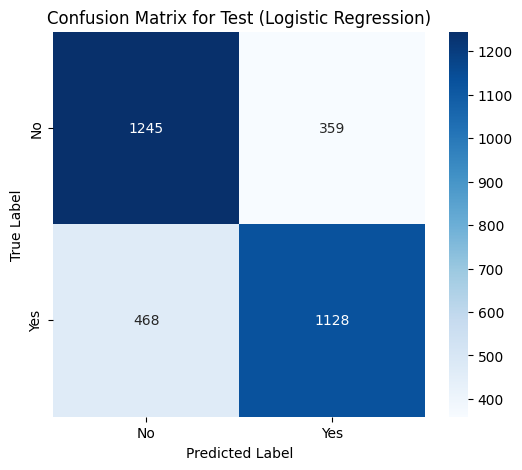

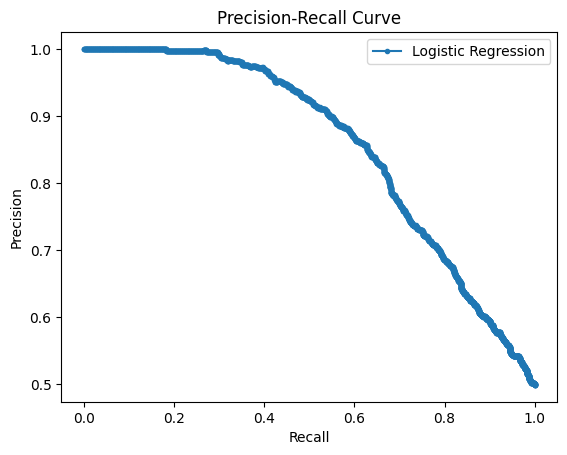

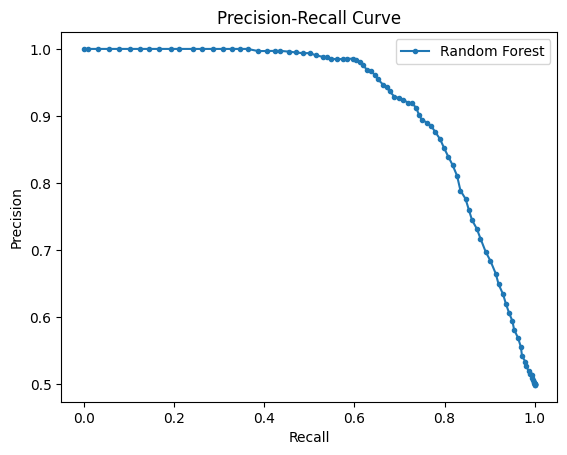


Random Forest performed better.
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Logistic Regression: {'C': 0.001, 'solver': 'liblinear'}

Evaluation for Test (Optimized Random Forest):
Accuracy: 0.8347
Precision: 0.9020
Recall: 0.7500
F1 Score: 0.8190
Confusion Matrix:
[[1474  130]
 [ 399 1197]]


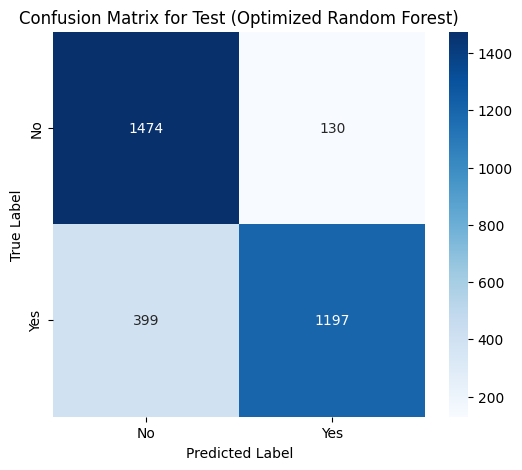


Evaluation for Test (Optimized Logistic Regression):
Accuracy: 0.7497
Precision: 0.7710
Recall: 0.7086
F1 Score: 0.7385
Confusion Matrix:
[[1268  336]
 [ 465 1131]]


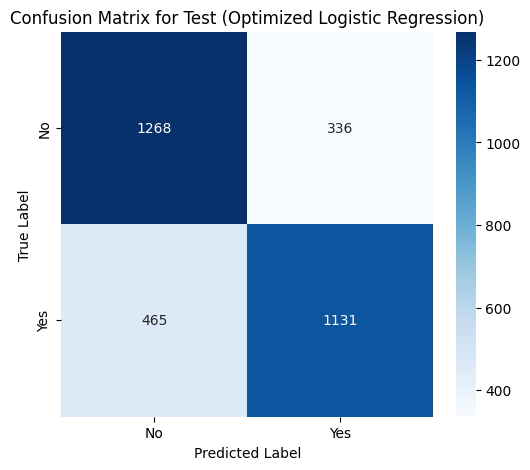

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

# Load Data (Replace 'df' with your actual dataset)
df = pd.read_csv("/content/heart_disease.csv")
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status']

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
if y.dtype == 'object':
    y = y.map({'Yes': 1, 'No': 0})  # Convert 'Yes'/'No' to 1/0

# Handle Missing Values
X.fillna(X.mean(), inplace=True)

# Check for class imbalance
print("Class Distribution Before Resampling:")
print(y.value_counts())

# Apply SMOTE to balance classes (ensure you have SMOTE installed via imbalanced-learn)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution After Resampling:")
print(y_resampled.value_counts())

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Train Logistic Regression
log_model = LogisticRegression(random_state=42, solver='liblinear')
log_model.fit(X_train_scaled, y_train)

# Make Predictions
y_test_pred_rf = rf_model.predict(X_test_scaled)
y_test_pred_log = log_model.predict(X_test_scaled)

# Get predicted probabilities for Precision-Recall
y_test_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_test_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Function to Evaluate Model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Evaluate both models
evaluate_model(y_test, y_test_pred_rf, "Test (Random Forest)")
evaluate_model(y_test, y_test_pred_log, "Test (Logistic Regression)")

# Function to Plot Precision-Recall Curve
def plot_precision_recall(y_true, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.plot(recall, precision, marker='.', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Compare Precision-Recall Curves
plot_precision_recall(y_test, y_test_proba_log, "Logistic Regression")
plot_precision_recall(y_test, y_test_proba_rf, "Random Forest")

# Determine Best Model based on F1 Score
log_f1 = f1_score(y_test, y_test_pred_log)
rf_f1 = f1_score(y_test, y_test_pred_rf)

if rf_f1 > log_f1:
    print("\nRandom Forest performed better.")
else:
    print("\nLogistic Regression performed better.")

# Hyperparameter Optimization: GridSearchCV for Random Forest and Logistic Regression
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

log_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Apply GridSearchCV for Random Forest hyperparameter tuning
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Apply GridSearchCV for Logistic Regression hyperparameter tuning
log_grid = GridSearchCV(LogisticRegression(random_state=42), log_params, cv=5, n_jobs=-1, verbose=1)
log_grid.fit(X_train_scaled, y_train)

# Print best parameters for both models
print("Best Parameters for Random Forest:", rf_grid.best_params_)
print("Best Parameters for Logistic Regression:", log_grid.best_params_)

# Train the optimized Random Forest
best_rf = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Train the optimized Logistic Regression
best_log = LogisticRegression(**log_grid.best_params_, random_state=42)
best_log.fit(X_train_scaled, y_train)

# Evaluate optimized models
y_test_pred_rf_opt = best_rf.predict(X_test_scaled)
y_test_pred_log_opt = best_log.predict(X_test_scaled)

# Evaluate on test set
evaluate_model(y_test, y_test_pred_rf_opt, "Test (Optimized Random Forest)")
evaluate_model(y_test, y_test_pred_log_opt, "Test (Optimized Logistic Regression)")
